# Cerebral Stroke Prediction Model

## **SADIA SHAKOOR**
## **SP23-BAI-047**

In [109]:

#import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

## Data Selection

In [110]:
stroke_df = pd.read_csv('dataset.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [111]:
# highly imbalanced
stroke_df['stroke'].value_counts()  

stroke
0    42617
1      783
Name: count, dtype: int64

## Data Preprocessing

Handling missing values

In [112]:
# checking no. of null values
stroke_df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [113]:
stroke_df['smoking_status'] = stroke_df['smoking_status'].fillna('unknown')

In [114]:
# Defining age bins
bins = [0, 18, 30, 45, 60, 80, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior', 'Elder']
stroke_df['age_group'] = pd.cut(stroke_df['age'], bins=bins, labels=labels)
stroke_df['age_group'].value_counts()

age_group
Middle Age     10038
Senior          9622
Adult           8615
Child           8039
Young Adult     6197
Elder            889
Name: count, dtype: int64

In [115]:
# Impute using median within age groups
stroke_df['bmi'] = stroke_df.groupby('age_group')['bmi'].transform(lambda x: x.fillna(x.median()))

C:\Users\HP\AppData\Local\Temp\ipykernel_46312\3428940541.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_df['bmi'] = stroke_df.groupby('age_group')['bmi'].transform(lambda x: x.fillna(x.median()))


In [116]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

Encoding catagorical data

In [117]:
le = LabelEncoder()
stroke_df['gender'] = le.fit_transform(stroke_df['gender'])
stroke_df['ever_married'] = le.fit_transform(stroke_df['ever_married'])
stroke_df['work_type'] = le.fit_transform(stroke_df['work_type'])
stroke_df['Residence_type'] = le.fit_transform(stroke_df['Residence_type'])
stroke_df['smoking_status'] = le.fit_transform(stroke_df['smoking_status'])

In [118]:
stroke_df = stroke_df.drop('age_group', axis=1)

In [119]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,3,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,3,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,3,0


Reducing Data size

In [120]:
stroke_df = stroke_df.sample(n=7000, random_state=42)

In [121]:
stroke_df['stroke'].value_counts()

stroke
0    6868
1     132
Name: count, dtype: int64

Splitting the data

In [122]:
X = stroke_df.drop(['id', 'stroke'], axis=1)
y = stroke_df['stroke']

Feature Scaling

In [123]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Train Test split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Handling Imbalanced Data

In [125]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Algorithms

### Random Forest Classifier
   - An ensemble method combining multiple decision trees to improve prediction accuracy and control overfitting.


In [126]:
rf_model = RandomForestClassifier(class_weight={0:0.05, 1:0.95},random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(f"Ramdom Forest Metrics: \n", classification_report(y_test, y_pred_rf))

Ramdom Forest Metrics: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2056
           1       0.25      0.07      0.11        44

    accuracy                           0.98      2100
   macro avg       0.62      0.53      0.55      2100
weighted avg       0.97      0.98      0.97      2100



### Logistic Regression 
   - A linear model optimized for binary classification tasks.


In [127]:
lr = LogisticRegression(class_weight= {0:0.5, 1: 0.5},random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Metrics:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Metrics:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82      2056
           1       0.06      0.86      0.11        44

    accuracy                           0.70      2100
   macro avg       0.53      0.78      0.47      2100
weighted avg       0.98      0.70      0.81      2100



### Support Vector Machine (SVM)
   - A robust classification algorithm, effective for small datasets and capable of handling high-dimensional feature spaces.


In [128]:
svm = SVC(class_weight='balanced', random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Metrics:\n", classification_report(y_test, y_pred_svm))


SVM Metrics:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      2056
           1       0.06      0.50      0.11        44

    accuracy                           0.83      2100
   macro avg       0.53      0.67      0.51      2100
weighted avg       0.97      0.83      0.89      2100



## Optimization

### Random Forest Classifier


In [129]:
from scipy.stats import randint

# Define the parameter grid
param_distributions = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_depth': [10, 20, None],       # Maximum depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples to split
    'min_samples_leaf': randint(1, 5),    # Minimum number of samples in a leaf
    'class_weight': ['balanced',None],   # Handling class imbalance
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='recall',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [10, 20, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BEE7A72710>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BEE78E3E10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BEE7A5EA90>},
                   random_state=42, scoring='recall')

Best parameters for Random Forest using Random Search

In [130]:
best_params = random_search.best_params_
best_params

{'class_weight': None,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 382}

Classification Report

In [131]:

# Create a new Random Forest model with the best parameters
rf_optimized = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight=best_params['class_weight'],
    random_state=42
)

# Retrain the model on the full training dataset
rf_optimized.fit(X_train, y_train)

# Evaluate the model on the test dataset
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_optimized.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2056
           1       0.10      0.18      0.13        44

    accuracy                           0.95      2100
   macro avg       0.54      0.57      0.55      2100
weighted avg       0.96      0.95      0.96      2100



Confusion Matrix

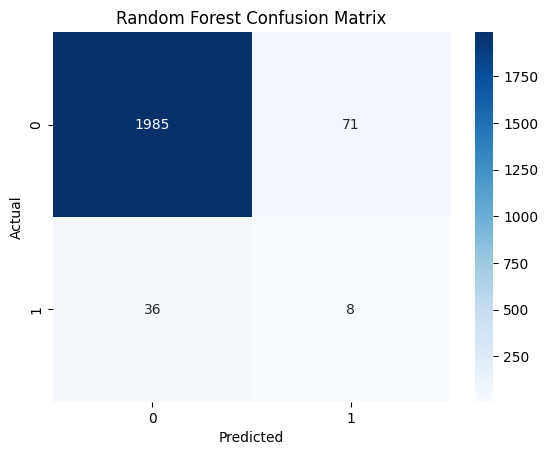

In [132]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistic Regression 

In [133]:

# Define the parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear'],  # Solvers supporting l1 and l2
    'class_weight': ['balanced']
}

# Initialize the model
lr = LogisticRegression(random_state=42, max_iter=1000)

grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring='recall',
    cv=3,
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='recall')

In [134]:
best_params_lr = grid_search_lr.best_params_
best_params_lr

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report

In [135]:

# Retrain the model with the optimized parameters
lr_optimized = LogisticRegression(
    **best_params_lr,
    random_state=42,
    max_iter=1000
)
lr_optimized.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = lr_optimized.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81      2056
           1       0.06      0.86      0.10        44

    accuracy                           0.69      2100
   macro avg       0.53      0.77      0.46      2100
weighted avg       0.98      0.69      0.80      2100



Confusion Matrix

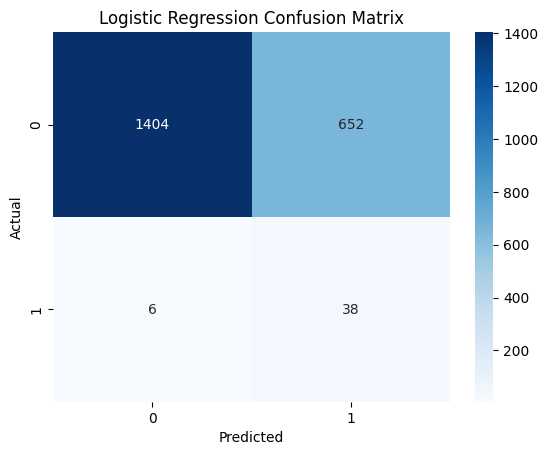

In [136]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Support Vector Machine (SVM)

In [ ]:
# Define the parameter grid
param_distributions_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['ploy', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced',None]
}

# Initialize the model
svm = SVC(random_state=42, probability=True)

random_search_svm = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_distributions_svm,
    n_iter=50,
    scoring='recall',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search_svm.fit(X_train, y_train)


In [138]:
best_params_svm = random_search_svm.best_params_
best_params_svm

{'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 10}

Classification Report

In [139]:

# Retrain the model with the optimized parameters
svm_optimized = SVC(
    **best_params_svm,
    random_state=42,
    probability=True
)
svm_optimized.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_optimized.predict(X_test)
print("Classification Report:", classification_report(y_test, y_pred_svm))

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.90      0.94      2056
           1       0.06      0.27      0.09        44

    accuracy                           0.89      2100
   macro avg       0.52      0.59      0.52      2100
weighted avg       0.96      0.89      0.92      2100



Confusion Matrix

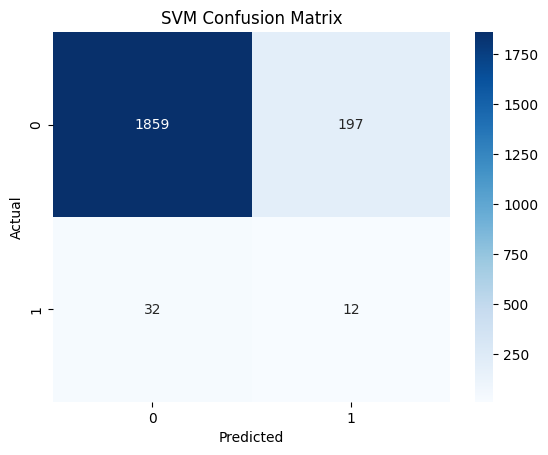

In [140]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Visualization

### Model Performance Metrics

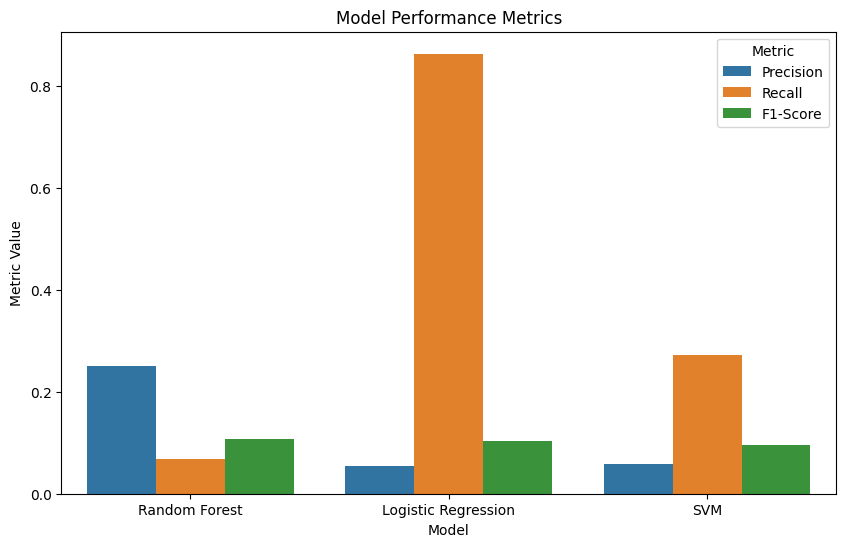

In [141]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for each model
metrics = {
    "Random Forest": {
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1-Score": f1_score(y_test, y_pred_rf)
    },
    "Logistic Regression": {
        "Precision": precision_score(y_test, y_pred_lr),
        "Recall": recall_score(y_test, y_pred_lr),
        "F1-Score": f1_score(y_test, y_pred_lr)
    },
    "SVM": {
        "Precision": precision_score(y_test, y_pred_svm),
        "Recall": recall_score(y_test, y_pred_svm),
        "F1-Score": f1_score(y_test, y_pred_svm)
    }
}

# Convert metrics to a format suitable for plotting
import pandas as pd
metrics_df = pd.DataFrame(metrics).T.reset_index()
metrics_df = metrics_df.melt(id_vars="index", var_name="Metric", value_name="Value")

# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x="index", y="Value", hue="Metric", data=metrics_df)
plt.title("Model Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.legend(title="Metric")
plt.show()